# 연습문제
1. 현재 데이터를 4D로 형변환 하세요. (모델의 시작은 Conv2D)
2. _labels 값을 이용하여 홀수와 짝수 구분만 하는 동일한 순서의 배열을 생성하시오.
3. _images 데이터를 입력으로 하고, 이미지와 홀짝 여부를 판별하는 모델을 만드시오.
4. model.evaluate()함수를 사용하여 test_데이터를 평가하면 5개의 결과가 나오는데 각 수치가 무엇을 의미하는지 텐서플로 문서를 확인하여 파악하시오.
5. 4D로 변환된 테스트 데이터 1개를 넣어 예측된 숫자와 홀짝 여부를 출력하시오. 이결과를 mnist다중출력 연습문제에 업로드하시오.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [45]:
# train_images_ed = np.expand_dims(train_images, axis = -1)

In [46]:
# train_images_scaled = train_images_ed.astype('float32')/255

In [2]:
train_images_reshape = train_images.reshape((len(train_images),28,28,1))
train_images_scaled = train_images_reshape.astype('float32')/255

In [3]:
test_images_reshape = test_images.reshape((len(test_images),28,28,1))
test_images_scaled = test_images_reshape.astype('float32')/255

In [4]:
train_labels_evenodd = train_labels % 2
test_labels_evenodd = test_labels % 2

In [5]:
import numpy as np

In [6]:
train_labels_evenodd = np.array(train_labels_evenodd)
test_labels_evenodd = np.array(test_labels_evenodd)

In [7]:
from keras import layers
from keras import Input
from keras.models import Model

In [8]:
images_input = Input(shape = (28,28,1), dtype = 'float32', name = 'images')
x = layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')(images_input)
x = layers.Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.4)(x)

In [9]:
# images
pred_images = layers.Dense(10, activation = 'softmax', name = 'number')(x)

# evenodd
pred_evenodd = layers.Dense(1,activation = 'sigmoid', name = 'evenodd')(x)

In [10]:
model = Model(images_input, [pred_images, pred_evenodd])

In [11]:
model.compile(optimizer = 'adam',
             loss = {'number':'sparse_categorical_crossentropy',
                     'evenodd': 'binary_crossentropy'},
             metrics = ['acc'])

In [12]:
import tensorflow as tf

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 64)   640         ['images[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 24, 24, 128)  73856       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 12, 12, 128)  0           ['conv2d_1[0][0]']               
                                                                                              

In [14]:
with tf.device('/CPU:0'):
    model.fit(train_images_scaled, [train_labels,train_labels_evenodd], epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.2505 - number_loss: 0.1729 - evenodd_loss: 0.0776 - number_acc: 0.9485 - evenodd_acc: 0.9716
Epoch 2/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1091 - number_loss: 0.0743 - evenodd_loss: 0.0348 - number_acc: 0.9784 - evenodd_acc: 0.9882
Epoch 3/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0847 - number_loss: 0.0579 - evenodd_loss: 0.0267 - number_acc: 0.9828 - evenodd_acc: 0.9908
Epoch 4/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0676 - number_loss: 0.0459 - evenodd_loss: 0.0218 - number_acc: 0.9862 - evenodd_acc: 0.9928
Epoch 5/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0591 - number_loss: 0.0410 - evenodd_loss: 0.0181 - number_acc: 0.9879 - evenodd_acc: 0.9941


In [15]:
with tf.device('/CPU:0'):
    model_eval = model.evaluate(test_images_scaled, [test_labels, test_labels_evenodd])

313/313 [==============================] - 5s 16ms/step - loss: 0.0414 - number_loss: 0.0283 - evenodd_loss: 0.0132 - number_acc: 0.9914 - evenodd_acc: 0.9955


In [16]:
import pandas as pd

In [17]:
eval_df = pd.DataFrame(model_eval).T
eval_df.columns = ['loss','number_loss','even/odd_loss','number_acc','even/odd_acc']

In [18]:
eval_df

,loss,number_loss,even/odd_loss,number_acc,even/odd_acc
0,0.041446,0.028254,0.013192,0.9914,0.9955


In [47]:
test_images_1 = test_images_scaled[2500].reshape((-1,28,28,1))

In [48]:
with tf.device('/CPU:0'):
    prediction = model.predict(test_images_1)

1/1 [==============================] - 0s 27ms/step


In [49]:
import matplotlib.pyplot as plt

test 1개 예측 결과 : 2, 홀수


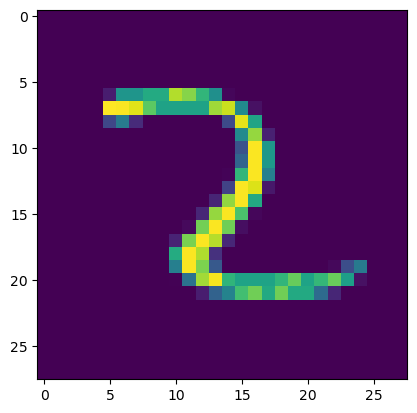

In [50]:
plt.imshow(test_images[2500])
even_odd = ''
if prediction[1] == 0:
    even_odd = '짝수'
else:
    even_odd = '홀수'
print('test 1개 예측 결과 : {}, {}'.format(np.argmax(prediction[0]), even_odd))

In [23]:
np.round(prediction[0],3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)